У нас есть данные о продажах в розничном магазине и нам надо по запросу брендов, чья продукция представлена  на нашей платформе выяснить каким клиентам (наиболее лояльным) предложить скидку.

Это логчиная маркетиноговая стретегия, потому что если у клиента есть патерн покупать продукцию одного бренда, то именно ему надо предоставит скидку. Таким образом лояльность станет еще выше, а значит клиент будет покупать еще больше товаров (вероятно сопутсвтующих) через наш сервис.

# Обработка данных

In [1]:

# импортируем нужные библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('https://stepik.org/media/attachments/lesson/383523/lesson_3_data__1_.csv', encoding='windows-1251')
print(df.head())


   Unnamed: 0                  tk  pl         dia        hs         tc  \
0        1242  120071109002055793   1  2007/11/09  0.505729  110000761   
1        1243  120070601004053633   1  2007/06/01  0.588519  110000761   
2        1244  120070928004076410   1  2007/09/28  0.785498   28491841   
3        1245  120070616003074261   1  2007/06/16  0.550961   95931501   
4        1246  120070519001018477   1  2007/05/19  0.804954   93265591   

        cta  id_art  id_subsubfam   id_subfam  ...   id_famn  id_seccion  \
0  11000076   21895  101070640100  1010706401  ...  10107064       10107   
1  11000076   21816  101070640100  1010706401  ...  10107064       10107   
2   2849184  562840  101070640100  1010706401  ...  10107064       10107   
3   9593150   28914  101070640100  1010706401  ...  10107064       10107   
4   9326559  159867  101070640100  1010706401  ...  10107064       10107   

   id_subagr  id_agr   vta  uni  id_artn                              art_sp  \
0        101      

Создадим датафрейм из нужных колонок : индекс клиента и товар (бренд)

In [2]:
necessary_df = df[['tc', 'art_sp']]
print(necessary_df)



               tc                              art_sp
0       110000761  MARAVILLA        500 G Store_Brand
1       110000761  FIDEO CABELLIN   500 G Store_Brand
2        28491841        SPAGUETTI Nє 5 500 G Brand_1
3        95931501       FIDEO FIDEUБ      500 Brand_7
4        93265591      MACARRONES  GRATINAR 5 Brand_2
...           ...                                 ...
48124    45518841      FIDEOS 0         500 G Brand_4
48125   110824211      PLUMAS 3         500 G Brand_4
48126  1408670389  MACARRONES       500 G Store_Brand
48127  1408670389  SPAGHETTI        500 G Store_Brand
48128    48582221  SPAGHETTINI      500 G Store_Brand

[48129 rows x 2 columns]


In [3]:
#переименуем
necessary_df = necessary_df.rename(columns={'tc': 'user_id', 'art_sp': 'brand_info'})

print(necessary_df)

          user_id                          brand_info
0       110000761  MARAVILLA        500 G Store_Brand
1       110000761  FIDEO CABELLIN   500 G Store_Brand
2        28491841        SPAGUETTI Nє 5 500 G Brand_1
3        95931501       FIDEO FIDEUБ      500 Brand_7
4        93265591      MACARRONES  GRATINAR 5 Brand_2
...           ...                                 ...
48124    45518841      FIDEOS 0         500 G Brand_4
48125   110824211      PLUMAS 3         500 G Brand_4
48126  1408670389  MACARRONES       500 G Store_Brand
48127  1408670389  SPAGHETTI        500 G Store_Brand
48128    48582221  SPAGHETTINI      500 G Store_Brand

[48129 rows x 2 columns]


Заметим, что в столбце brand_info информация представлена так: "Товар    Вес G Название_бренда"

Но нам же надо рассматривать лояльность фирме, а не товару => нам надо вытащить данные о фирмах

In [4]:
necessary_df['brand_name'] = necessary_df['brand_info'].apply(lambda x: x.split()[-1]) #к серии 'brand_info' применили lambda x
#necessary_df =necessary_df[['user_id', 'brand_name']]
print(necessary_df)

          user_id                          brand_info   brand_name
0       110000761  MARAVILLA        500 G Store_Brand  Store_Brand
1       110000761  FIDEO CABELLIN   500 G Store_Brand  Store_Brand
2        28491841        SPAGUETTI Nє 5 500 G Brand_1      Brand_1
3        95931501       FIDEO FIDEUБ      500 Brand_7      Brand_7
4        93265591      MACARRONES  GRATINAR 5 Brand_2      Brand_2
...           ...                                 ...          ...
48124    45518841      FIDEOS 0         500 G Brand_4      Brand_4
48125   110824211      PLUMAS 3         500 G Brand_4      Brand_4
48126  1408670389  MACARRONES       500 G Store_Brand  Store_Brand
48127  1408670389  SPAGHETTI        500 G Store_Brand  Store_Brand
48128    48582221  SPAGHETTINI      500 G Store_Brand  Store_Brand

[48129 rows x 3 columns]


In [5]:
# сгруппируем покупки по пользователям
users_purchases = necessary_df.groupby('user_id',as_index=False).agg({'brand_name': 'count'}).rename(columns={'brand_name': 'purchases'})
print(users_purchases)

          user_id  purchases
0     -1236394515          1
1            1031          6
2            4241          5
3           17311          2
4           17312          2
...           ...        ...
11759  1408817589          3
11760  1408825059          1
11761  1408832719          3
11762  1408840919          1
11763  1408849249          1

[11764 rows x 2 columns]


Важно помнить, что здесь у нас для каждого пользователя кол-во всех покупок

#  Разведочный анализ данных

Для начала познакомимся еще с данными ближе

In [6]:
# узнаемм кол-во уникальных пользователей
print(users_purchases.shape[0])

11764


In [7]:
#посмотрим на описательные статистики
print(users_purchases.describe())


            user_id     purchases
count  1.176400e+04  11764.000000
mean   7.690517e+07      4.091210
std    1.622210e+08      4.573143
min   -1.236395e+09      1.000000
25%    1.503761e+07      1.000000
50%    4.682179e+07      2.000000
75%    9.311601e+07      5.000000
max    1.408849e+09     60.000000


Заметим, что медианное значение кол-ва покупок = 2 ( т е 50% совершили меньше 2 покупок и 50% больше 2 покупок), но при этом заметим, что третий квартиль(75%) = 5 => 25% всех пользователей совершили 5 и более покупок

Корректнее будет анализировать выборку тех пользователей, которые использовали наш сервис не разово. Для начал возьмем порог в 5 покупок. То есть отберемем только тех пользователей у которых есть  5 и более покупок любых брендов

In [8]:
users_purchases = users_purchases.query('purchases >= 5')
print(users_purchases)

          user_id  purchases
1            1031          6
2            4241          5
11          25971          7
14          40911         27
16          45181          5
...           ...        ...
11740  1408767189          5
11750  1408783189         10
11751  1408783379          6
11754  1408798879          8
11757  1408810219          9

[3383 rows x 2 columns]


# Непосредственно анализ

Заметим, что таких пользователей 3383, что не мало, а значит продолжаем работать дальше

Сгруппируем данные по пользователям и брендам и посчитаем их кол-во

In [9]:
users_brands_count= necessary_df.groupby(['user_id','brand_name'], as_index=False).agg({'brand_info': 'count'})
print(users_brands_count)


          user_id   brand_name  brand_info
0     -1236394515      Brand_4           1
1            1031      Brand_3           1
2            1031  Store_Brand           5
3            4241      Brand_4           3
4            4241  Store_Brand           2
...           ...          ...         ...
18183  1408817589  Store_Brand           2
18184  1408825059      Brand_1           1
18185  1408832719      Brand_4           3
18186  1408840919  Store_Brand           1
18187  1408849249  Store_Brand           1

[18188 rows x 3 columns]


Теперь у нас есть у каждого пользователя разбивка по брендам, которые он покупает, да еще и мы знаем кол-во каждого

Оценить лояльность можно так: берем бренд, который клиент покупает больше всего . Далее смотрим какую долю этот бренд составляет от остальынх

Для начала отсортируем так, чтобы наверху был тот бренд, который мы покупаем наиболее часто

In [10]:
users_brands_count= necessary_df.groupby(['user_id','brand_name'], as_index=False).agg({'brand_info': 'count'}).sort_values(['user_id', 'brand_info'], ascending=False)
print(users_brands_count)

          user_id   brand_name  brand_info
18187  1408849249  Store_Brand           1
18186  1408840919  Store_Brand           1
18185  1408832719      Brand_4           3
18184  1408825059      Brand_1           1
18183  1408817589  Store_Brand           2
...           ...          ...         ...
3            4241      Brand_4           3
4            4241  Store_Brand           2
2            1031  Store_Brand           5
1            1031      Brand_3           1
0     -1236394515      Brand_4           1

[18188 rows x 3 columns]


Теперь для каждого пользователя сделаем так, чтобы у нас остался только самый любимы товар. Этого можно добиться с помощью метода head(1), ведь мы отсортировали все по убыванию

In [11]:
users_brands_only_favor = users_brands_count.groupby('user_id').head(1)
print(users_brands_only_favor)


          user_id   brand_name  brand_info
18187  1408849249  Store_Brand           1
18186  1408840919  Store_Brand           1
18185  1408832719      Brand_4           3
18184  1408825059      Brand_1           1
18183  1408817589  Store_Brand           2
...           ...          ...         ...
6           17312      Brand_1           1
5           17311      Brand_4           2
3            4241      Brand_4           3
2            1031  Store_Brand           5
0     -1236394515      Brand_4           1

[11764 rows x 3 columns]


Переименуем столбцы так, чтобы они отражали смысл полей

In [12]:
users_brands_only_favor.rename(columns={'brand_name':'lovely_brand', 'brand_info': 'quantity'}, inplace=True)
print(users_brands_only_favor)

          user_id lovely_brand  quantity
18187  1408849249  Store_Brand         1
18186  1408840919  Store_Brand         1
18185  1408832719      Brand_4         3
18184  1408825059      Brand_1         1
18183  1408817589  Store_Brand         2
...           ...          ...       ...
6           17312      Brand_1         1
5           17311      Brand_4         2
3            4241      Brand_4         3
2            1031  Store_Brand         5
0     -1236394515      Brand_4         1

[11764 rows x 3 columns]


<ipython-input-12-b4f3bae6b0af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_brands_only_favor.rename(columns={'brand_name':'lovely_brand', 'brand_info': 'quantity'}, inplace=True)


Теперь у нас есть два датафрейма: тот который показывает самый препочтительный бренд и кол-во покуппок этого бренда для каждого юзера
И тот который для каждого юзера показывает общее число покупок, тепеь нам надо их объеденить

Это датафрейм users_purchases  и users_brands_only_favor

In [15]:
joint = users_brands_only_favor.merge(users_purchases, on= 'user_id')
print(joint)

         user_id lovely_brand  quantity  purchases
0     1408810219      Brand_2         6          9
1     1408798879  Store_Brand         4          8
2     1408783379      Brand_1         4          6
3     1408783189  Store_Brand         8         10
4     1408767189      Brand_4         5          5
...          ...          ...       ...        ...
3378       45181  Store_Brand         2          5
3379       40911      Brand_4        19         27
3380       25971  Store_Brand         5          7
3381        4241      Brand_4         3          5
3382        1031  Store_Brand         5          6

[3383 rows x 4 columns]


Для каждого пользвоателя посчитаем долю покупок любимого бренда от всех покупок

In [19]:
joint['loyalty_score'] = joint['quantity'] / joint['purchases']
print(joint)

         user_id lovely_brand  quantity  purchases  loyalty_score
0     1408810219      Brand_2         6          9       0.666667
1     1408798879  Store_Brand         4          8       0.500000
2     1408783379      Brand_1         4          6       0.666667
3     1408783189  Store_Brand         8         10       0.800000
4     1408767189      Brand_4         5          5       1.000000
...          ...          ...       ...        ...            ...
3378       45181  Store_Brand         2          5       0.400000
3379       40911      Brand_4        19         27       0.703704
3380       25971  Store_Brand         5          7       0.714286
3381        4241      Brand_4         3          5       0.600000
3382        1031  Store_Brand         5          6       0.833333

[3383 rows x 5 columns]


Посмотрим на распределение этой доли

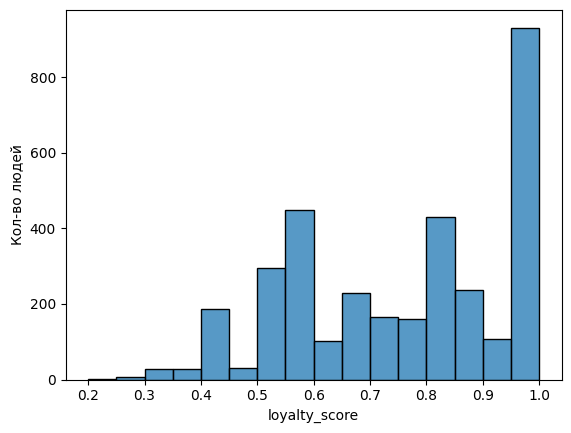

In [28]:
ax = sns.histplot(data=joint,x='loyalty_score')
ax.set_ylabel("Кол-во людей")
plt.show()

В зависимости от задачи заказчика (насколько лояльные клиенты ему нужны длля внедрения програмыы лояльности ) мы отбираем нужных клиентов и отсылаем ему

Также можно посмореть на распределение лояльных клиентов по брендам

In [29]:
by_brands = joint.groupby('lovely_brand', as_index=False).agg({'loyalty_score': 'median', 'user_id':'count'})
print(by_brands)

  lovely_brand  loyalty_score  user_id
0      Brand_1       0.679487      410
1      Brand_2       0.600000       88
2      Brand_3       0.500000      115
3      Brand_4       0.818182     2041
4      Brand_5       0.600000        5
5      Brand_7       0.444444        9
6  Store_Brand       0.750000      715


Сначал посмотрим на среднее значение loyalty_score   по каждому бренду

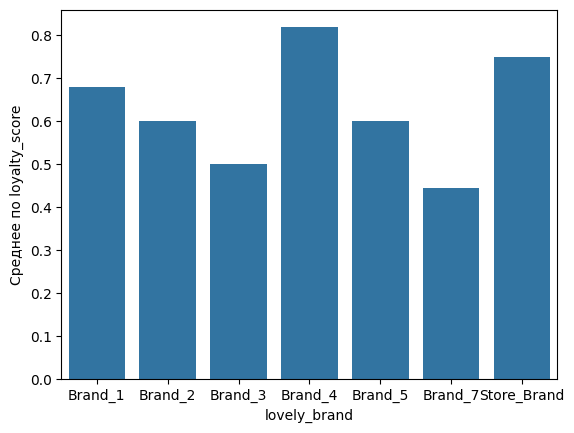

In [31]:
ax2 = sns.barplot(data=by_brands, x='lovely_brand' , y= 'loyalty_score')
ax2.set_ylabel('Среднее по loyalty_score')
plt.show()

Заметим, что у Brand_4 самая высокая лояльность в среднем

Теперь посмотрим на кол-во лояльных пользователей для каждого бренда

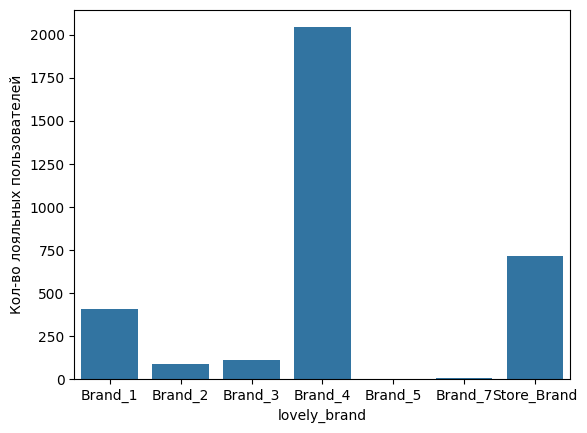

In [33]:
ax3 = sns.barplot(data=by_brands, x='lovely_brand' , y= 'user_id')
ax3.set_ylabel('Кол-во лояльных пользователей')
plt.show()

Заметим, что Brand_4 является безоговоррочным лидером по кол-ву лояльных клиентов

Мы можем обратиться к Brand_4 с хорошими новостями, ведь большинство лояльных клиентов в общей массе лояльны именно этому бренду
